Trying simple KFold

In [7]:
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds = 5, shuffle = False)

# printing the contents of the training and test dataset
#print ('{} {:^61} {}').format('Iteration', 'Training set observations', 'Testing set observations')
print ('Iteration', 'Training set observations', 'Testing set observations')
for iteration, data in enumerate(kf, start = 1):
    print (iteration, data[0], data[1])

Iteration Training set observations Testing set observations
1 [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [0 1 2 3 4]
2 [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [5 6 7 8 9]
3 [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24] [10 11 12 13 14]
4 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24] [15 16 17 18 19]
5 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [20 21 22 23 24]


### Cross - Validation : Parameter Tuning

In [8]:
# importing dataset
from sklearn.datasets import load_iris
iris = load_iris()

# preparing training and test dataset
x = iris.data
y = iris.target

from sklearn.neighbors import KNeighborsClassifier

# value of k = 5
knn = KNeighborsClassifier(n_neighbors = 5)

from sklearn.cross_validation import cross_val_score

In [9]:
# using 10-fold cross validation with K=5 in KNN
scores = cross_val_score(knn, x, y, cv = 10, scoring = 'accuracy')
print (scores)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [10]:
print(scores.mean())

0.966666666667


In [11]:
# find best value for k
k_scores = []
k_range = range(1,31)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x, y, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


Text(0,0.5,'Accuracy Score')

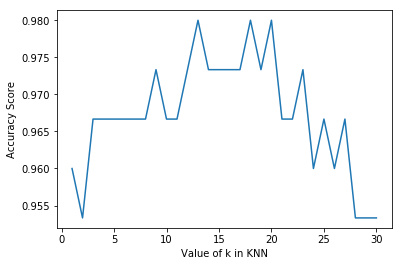

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Value of k in KNN')
plt.ylabel('Accuracy Score')

### Comparing cross validation model between KNN and Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print (cross_val_score(logreg, x, y, cv= 10, scoring = 'accuracy').mean())

0.953333333333


In [14]:
knn = KNeighborsClassifier(n_neighbors = 20)
print (cross_val_score(knn, x, y, cv = 10, scoring = 'accuracy').mean())

0.98


### Feature Selection using Cross Validation

In [16]:
import numpy as np
import pandas as pd

# want to remove the first column from above dataset
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col = 0)

feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data['sales']

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv = 10, scoring = 'neg_mean_squared_error')
print (scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [17]:
mse_scores = -scores
print (mse_scores)

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [18]:
# find RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 1.88689808  1.81595022  1.44548731  1.68069713  1.14139187  1.31971064
  2.85891276  1.45399362  1.7443426   1.56614748]


In [20]:
# calculating the average RMSE
print (rmse_scores.mean())

1.69135317081


10 fold cross validation excluding the Newspaper column

In [21]:
feature_cols = ['TV', 'radio']
X = data[feature_cols]
print (np.sqrt(-cross_val_score(lm, X, y, cv = 10, scoring = 'neg_mean_squared_error')).mean())

1.67967484191


### GridSearchCV for efficient parameter tuning

In [23]:
from sklearn.model_selection import GridSearchCV

k_range = range(1, 31)
print (k_range)

range(1, 31)


In [24]:
param_grid = dict(n_neighbors = k_range)
print(param_grid)

{'n_neighbors': range(1, 31)}


In [25]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring = 'accuracy')

In [27]:
x = iris.data
y = iris.target
grid.fit(x,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 31)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [29]:
grid.grid_scores_

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [31]:
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

{'n_neighbors': 1}
[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  1.          1.          1.        ]
0.96


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [34]:
print(grid.cv_results_)

{'mean_fit_time': array([ 0.00120008,  0.00120168,  0.        ,  0.0003948 ,  0.        ,
        0.00039618,  0.        ,  0.        ,  0.        ,  0.        ,
        0.00039978,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.00080364,  0.        ,  0.00039985,  0.00040565,
        0.00079505,  0.00040338,  0.00040002,  0.0004035 ,  0.        ,
        0.00040498,  0.00040002,  0.00039992,  0.00039992,  0.00040004]), 'std_fit_time': array([ 0.00183322,  0.00183565,  0.        ,  0.00118439,  0.        ,
        0.00118854,  0.        ,  0.        ,  0.        ,  0.        ,
        0.00119934,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.0016073 ,  0.        ,  0.00119956,  0.00121694,
        0.00159015,  0.00121014,  0.00120006,  0.0012105 ,  0.        ,
        0.00121493,  0.00120006,  0.00119977,  0.00119977,  0.00120013]), 'mean_score_time': array([ 0.00079997,  0.00039978,  0.0008054 ,  0.00080032,  0.00079978,
       

In [35]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97999999999999998, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.95999999999999996, 0.96666666666666667, 0.95999999999999996, 0.96666666666666667, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Text(0,0.5,'Cross Validated Accuracy Score')

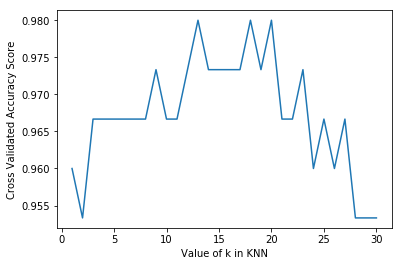

In [36]:
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of k in KNN')
plt.ylabel('Cross Validated Accuracy Score')

In [37]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


### Using multiple parameters

In [39]:
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors = k_range, weights = weight_options)
print (param_grid)
grid = GridSearchCV(knn, param_grid, cv=10, scoring = 'accuracy')
grid.fit(x,y)

{'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']}


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [41]:
grid.grid_scores_

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, para

In [42]:
print (grid.best_score_)
print (grid.best_params_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


### Using best parameters to make predictions

In [47]:
x = iris.data
y = iris.target
knn = KNeighborsClassifier(n_neighbors = 13, weights = 'uniform')
knn.fit(x,y)
knn.predict([[3,5,4,2]])

array([1])

In [48]:
grid.predict([[3,5,4,2]])

array([1])

### RandomizedSearchCV

In [49]:
from sklearn.grid_search import RandomizedSearchCV
param_dist = dict(n_neighbors = k_range, weights = weight_options)
rand = RandomizedSearchCV(knn, param_dist, cv = 10, scoring = 'accuracy', n_iter = 10, random_state = 5)
rand.fit(x,y)
rand.grid_scores_

[mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 16},
 mean: 0.96667, std: 0.03333, params: {'weights': 'uniform', 'n_neighbors': 22},
 mean: 0.98000, std: 0.03055, params: {'weights': 'uniform', 'n_neighbors': 18},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 27},
 mean: 0.95333, std: 0.04269, params: {'weights': 'uniform', 'n_neighbors': 29},
 mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 22},
 mean: 0.97333, std: 0.04422, params: {'weights': 'uniform', 'n_neighbors': 14},
 mean: 0.97333, std: 0.04422, params: {'weights': 'distance', 'n_neighbors': 12},
 mean: 0.97333, std: 0.03266, params: {'weights': 'uniform', 'n_neighbors': 15}]

In [50]:
print (rand.best_score_)
print (rand.best_params_)

0.98
{'weights': 'uniform', 'n_neighbors': 18}


In [52]:
# running randomizedsearchcv for 20 times
# find best value for k
k_scores = []
k_range = range(1,20)
for k in k_range:
    rand = RandomizedSearchCV(knn, param_dist, cv = 10, scoring = 'accuracy', n_iter = 10)
    rand.fit(x,y)
    k_scores.append(round(rand.best_score_, 3))
print(k_scores)

[0.98, 0.98, 0.98, 0.973, 0.973, 0.973, 0.98, 0.98, 0.973, 0.98, 0.98, 0.973, 0.98, 0.98, 0.98, 0.973, 0.973, 0.98, 0.98]
